In [3]:
class Child:
    def __init__(self, indid, has_asd, is_male, mother_id, father_id):
        self.id = indid
        self.has_asd = has_asd
        self.is_male = is_male
        self.mother_id = mother_id
        self.father_id = father_id

    def __repr__(self):
        return '%s, has_asd=%d, is_male=%d' % (self.id, self.has_asd, self.is_male)

children = {}
with open('160826.ped', 'r') as f:
    for line in f:
        pieces = line.strip().split('\t')
        if len(pieces) == 6:
            family_id, individual_id, paternal_id, maternal_id, sex, phen = pieces
            is_male = sex == '1'
            has_asd = phen == '2'

            if paternal_id != '0' and maternal_id != '0':
                children[individual_id] = Child(individual_id, has_asd, is_male, maternal_id, paternal_id)

parent_ids = set([x.mother_id for x in children.values()]) | set([x.father_id for x in children.values()])
child_ids = children.keys()
print('Parents:', len(parent_ids))
print('Children:', len(child_ids))


    

Parents: 2246
Children: 2854


In [25]:
import gzip

with open('v34.22.vcf', 'r') as f:
    line = next(f)
    while line.startswith('##'):
        line = next(f)
    sample_ids = line.strip().split('\t')[9:]
print(len(sample_ids))

4610


In [111]:
import numpy as np
import os

def interpolate(data, col_indices, n):
    interpolated = np.zeros((n))
    change = data[1:]-data[:-1]
    
    start = 0 if data[0] == 1 else None
    for k in np.where(change != 0)[0]:
        if change[k] == 1:
            start = col_indices[k]
        elif change[k] == -1:
            end = col_indices[k]+1
            interpolated[start:end] = 1
            start = None
        else:
            print('Error', change[index])
    if data[-1] == 1:
        interpolated[start:] = 1
    return interpolated

# First row is autism-autism pairs, second row is autism-typical pairs and third row is typical-typical pairs
n = 3000000
maternal_concordance = np.zeros((3, n))
paternal_concordance = np.zeros((3, n))
both_concordance = np.zeros((3, n))
neither_concordance = np.zeros((3, n))
counts = np.zeros((3))
max_index = 0

for filename in os.listdir('raw_data'):
    if filename.endswith('19.npz'): 
        print(filename)
        with np.load('raw_data/%s' % filename) as data:
            X = data['X'].astype(int)
            
            if 'col_indices' in data:
                col_indices = data['col_indices']
                row_indices = data['row_indices']

                has_asd = [children[sample_ids[i]].has_asd for i in row_indices[2:]]
                
                if col_indices[-1] > max_index:
                    max_index = col_indices[-1]

                # For all pairs of children
                for i, i_has_asd in enumerate(has_asd):
                    for j, j_has_asd in enumerate(has_asd):
                        if i < j:
                            mcon = (X[(2+i), 0, :] * X[(2+j), 0, :]) + (X[(2+i), 1, :] * X[(2+j), 1, :])
                            fcon = (X[(2+i), 2, :] * X[(2+j), 2, :]) + (X[(2+i), 3, :] * X[(2+j), 3, :])
                            bothcon = mcon * fcon
                            neithercon = (1-mcon) * (1-fcon)

                            if i_has_asd and j_has_asd:
                                index = 0
                            elif (not i_has_asd) and (not j_has_asd):
                                index = 2
                            else:
                                index = 1

                            maternal_concordance[index, :] += interpolate(mcon, col_indices, n)  
                            paternal_concordance[index, :] += interpolate(fcon, col_indices, n)  
                            both_concordance[index, :] += interpolate(bothcon, col_indices, n)  
                            neither_concordance[index, :] += interpolate(neithercon, col_indices, n)  

                            counts[index] += 1
                            
                


AU3360.v34.19.npz
AU3402.v34.19.npz
AU0955.v34.19.npz
AU1092.v34.19.npz
AU1499.v34.19.npz
AU3302.v34.19.npz
AU2129.v34.19.npz
AU1792.v34.19.npz
AU1842.v34.19.npz
AU1399.v34.19.npz
AU0814.v34.19.npz
AU1686.v34.19.npz
AU2522.v34.19.npz
AU1679.v34.19.npz
AU1404.v34.19.npz
AU1433.v34.19.npz
AU3905.v34.19.npz
AU1351.v34.19.npz
AU1510.v34.19.npz
AU1272.v34.19.npz
AU1245.v34.19.npz
AU1038.v34.19.npz
AU1466.v34.19.npz
AU1333.v34.19.npz
AU3794.v34.19.npz
AU1210.v34.19.npz
AU1572.v34.19.npz
AU3680.v34.19.npz
AU1227.v34.19.npz
AU3777.v34.19.npz
AU2157.v34.19.npz
AU2160.v34.19.npz
AU3101.v34.19.npz
AU0808.v34.19.npz
AU0199.v34.19.npz
AU3636.v34.19.npz
AU3154.v34.19.npz
AU1291.v34.19.npz
AU2893.v34.19.npz
AU1746.v34.19.npz
AU1652.v34.19.npz
AU1665.v34.19.npz
AU1559.v34.19.npz
AU3858.v34.19.npz
AU0133.v34.19.npz
AU0651.v34.19.npz
AU0379.v34.19.npz
AU1318.v34.19.npz
AU0895.v34.19.npz
AU1174.v34.19.npz
AU0677.v34.19.npz
AU0115.v34.19.npz
AU1309.v34.19.npz
AU0640.v34.19.npz
AU1143.v34.19.npz
AU3849.v34

AU1871.v34.19.npz
AU1796.v34.19.npz
AU1289.v34.19.npz
AU0095.v34.19.npz
AU2350.v34.19.npz
AU1965.v34.19.npz
AU1523.v34.19.npz
AU1276.v34.19.npz
AU1514.v34.19.npz
AU2793.v34.19.npz
AU1355.v34.19.npz
AU1437.v34.19.npz
AU1400.v34.19.npz
AU1362.v34.19.npz
AU1223.v34.19.npz
AU0242.v34.19.npz
AU1576.v34.19.npz
AU1069.v34.19.npz
AU3840.v34.19.npz
AU3790.v34.19.npz
AU0356.v34.19.npz
AU1300.v34.19.npz
AU1462.v34.19.npz
AU2070.v34.19.npz
AU1838.v34.19.npz
AU2725.v34.19.npz
AU1481.v34.19.npz
AU3605.v34.19.npz
AU0918.v34.19.npz
AU1979.v34.19.npz
AU1381.v34.19.npz
AU1103.v34.19.npz
AU0714.v34.19.npz
AU1508.v34.19.npz
AU1986.v34.19.npz
AU2868.v34.19.npz
AU0041.v34.19.npz
AU1156.v34.19.npz
AU0137.v34.19.npz
AU1042.v34.19.npz
AU0306.v34.19.npz
AU1678.v34.19.npz
AU1350.v34.19.npz
AU0453.v34.19.npz
AU1273.v34.19.npz
AU1039.v34.19.npz
AU1244.v34.19.npz
AU1305.v34.19.npz
AU1467.v34.19.npz
AU0364.v34.19.npz
AU1178.v34.19.npz
AU2096.v34.19.npz
AU1332.v34.19.npz
AU1573.v34.19.npz
AU1211.v34.19.npz
AU1226.v34

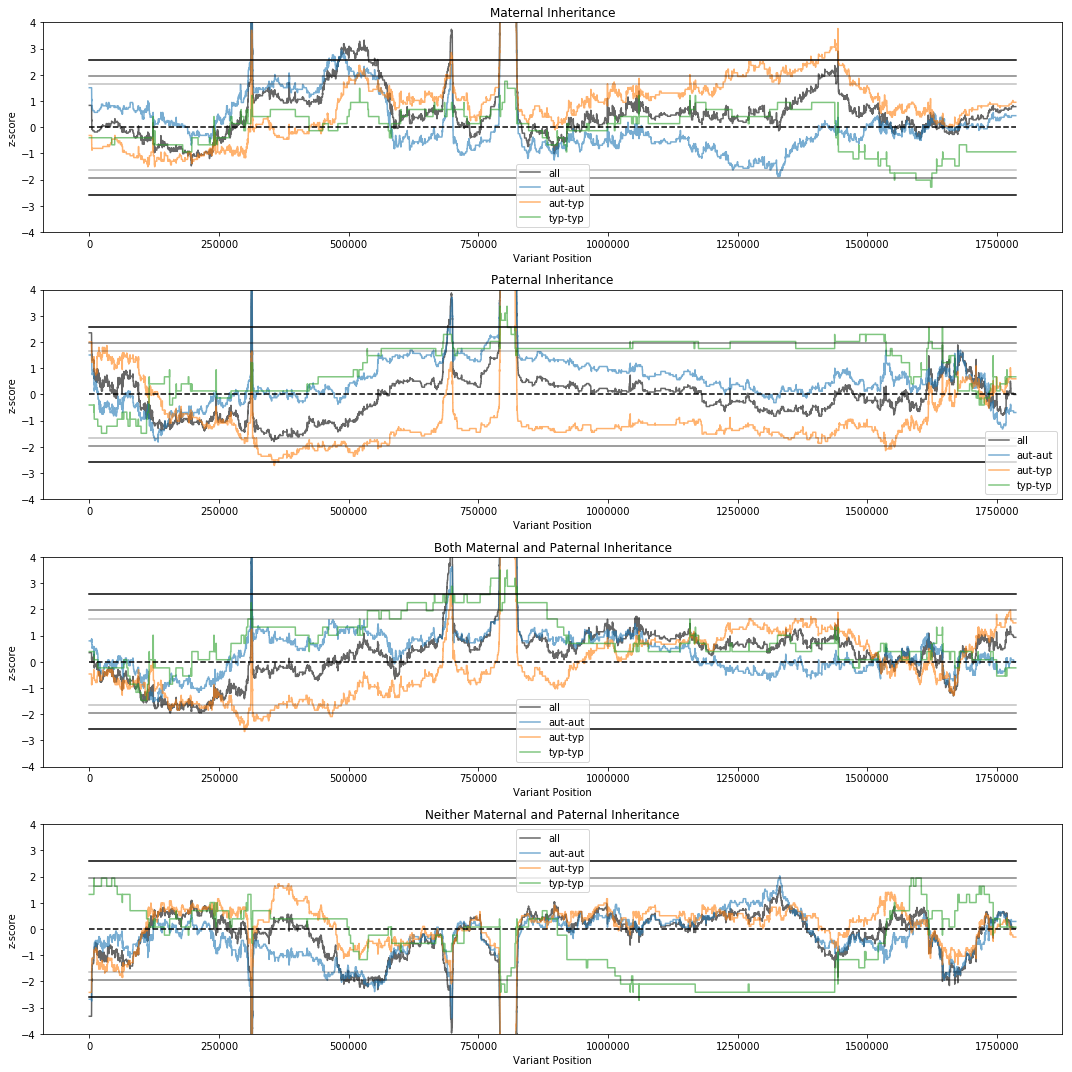

In [137]:
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(15, 15))

for i, (title, data, p) in enumerate([('Maternal Inheritance', maternal_concordance, 0.5), 
                                ('Paternal Inheritance', paternal_concordance, 0.5), 
                                ('Both Maternal and Paternal Inheritance', both_concordance, 0.25), 
                                ('Neither Maternal and Paternal Inheritance', neither_concordance, 0.25)]):
    plt.subplot(4, 1, i+1)

    # p-estimate
    all_p = ((np.sum(data[:,:(max_index+1)], axis=0)/np.sum(counts))-p)/math.sqrt(p*(1-p)/np.sum(counts))
    aut_p = ((data[0,:(max_index+1)]/counts[0])-p)/math.sqrt(p*(1-p)/counts[0])
    auttyp_p = ((data[1,:(max_index+1)]/counts[1])-p)/math.sqrt(p*(1-p)/counts[1])
    typ_p = ((data[2,:(max_index+1)]/counts[2])-p)/math.sqrt(p*(1-p)/counts[2])

    plt.plot(range(max_index+1), all_p, alpha=0.6, label='all', color='black')
    plt.plot(range(max_index+1), aut_p, alpha=0.6, label='aut-aut')
    plt.plot(range(max_index+1), auttyp_p, alpha=0.6, label='aut-typ')
    plt.plot(range(max_index+1), typ_p, alpha=0.6, label='typ-typ')

    # Plot settings
    plt.plot([0, max_index+1], [0, 0], color='black', linestyle='--')
    plt.plot([0, max_index+1], [1.645, 1.645], color='black', alpha=0.25)
    plt.plot([0, max_index+1], [-1.645, -1.645], color='black', alpha=0.25)
    plt.plot([0, max_index+1], [1.96, 1.96], color='black', alpha=0.5)
    plt.plot([0, max_index+1], [-1.96, -1.96], color='black', alpha=0.5)
    plt.plot([0, max_index+1], [2.58, 2.58], color='black')
    plt.plot([0, max_index+1], [-2.58, -2.58], color='black')
    plt.ylim([-4, 4])
    plt.title(title)
    plt.ylabel('z-score')
    plt.xlabel('Variant Position')
    plt.legend()

plt.tight_layout()
plt.show()

In [90]:
print(counts)

[ 1016.   807.    55.]


In [112]:
np.savez_compressed('data/chr19_inheritance', maternal=maternal_concordance[:, :(max_index+1)], paternal=paternal_concordance[:, :(max_index+1)],
                   both=both_concordance[:, :(max_index+1)], neither=neither_concordance[:, :(max_index+1)], counts=counts)

In [136]:
with np.load('data/chr19_inheritance.npz') as data:
    maternal_concordance = data['maternal']
    paternal_concordance = data['paternal']
    both_concordance = data['both']
    neither_concordance = data['neither']
    counts = data['counts']
    max_index = maternal_concordance.shape[1]-1